# 数理最適化
---
今回はpythonのライブラリで，数理最適化の時によく使われる'pulp'というもので簡単な連立不等式などを解いていきます．


強化学習の文脈でもLP問題に置き換えて解くという方法があります．

実際に例題を確認していきます．


---

(例題)

次の関数を4つの条件のもとで最大化せよ．

$$

\max \quad 3x - 5y + 10 \\
s.t.\quad x \geq 0 \\
y \geq 0 \\
x + y \leq 10 \\
8x + y \leq 15

$$

制約条件を図字するとこのようになり，この範囲内で最大化すれば良いことになります．
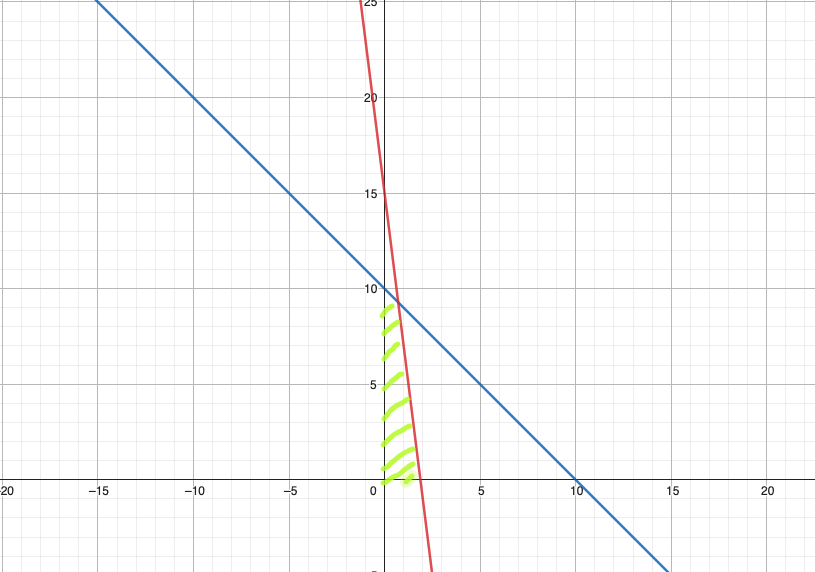

この問題を考えるときのpythonのコードはpulpを使うと以下のようになります．


In [2]:
import pulp

problem = pulp.LpProblem('LP',pulp.LpMaximize) #LP問題で最大化問題

#変数xとyを定義
x = pulp.LpVariable('x',cat='Continuous')
y = pulp.LpVariable('y',cat='Continuous')

#制約条件の追加
problem += x >= 0
problem += y >= 0
problem += x + y <= 10
problem += 8 * x + y <= 15

#最適したい式も追加する
problem += 3 * x - 5 * y + 10

status = problem.solve()

print(f'最適な時のxの値は{x.value()},yの値は{y.value()},その時の式の値は{problem.objective.value()}')


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ichiharayuuseimare/opt/anaconda3/envs/syumi-note/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/0da2f4d67176481facf4e97290a368f0-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/0da2f4d67176481facf4e97290a368f0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 5.625
After Postsolve, objective 5.625, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5.625 - 0 iterations time 0.002, Presolve 0.00
Option f

解けました.

---
# Primal Dual法

ここからはPrimal Dual法について説明していきます，

先ほど最適化した問題は，主問題(Primal Problem)と言います．

ここで主問題の式を一般化して書きます．

$$
\max \quad f(x)=\sum_{j=1}^n c_j x_j \\
\begin{aligned}
s.t.\quad & \sum_{j=1}^n a_{i j} x_j \geq b_i \quad(i=1, \cdots, m) \\
& x_j \geq 0 \quad(j=1, \cdots, n)
\end{aligned}

$$

このような問題を解いていました．

そして，主問題とは別に双対問題(Dual Problem)というものがあります．

双対問題の式はこのようになります．

$$
\min \quad f^*(\boldsymbol{y})=\sum_{i=1}^m b_i y_i\\
\begin{aligned}s.t.\quad
& \sum_{i=1}^m a_{i j} y_i \leq c_j \quad(j=1, \cdots, n) \\
& y_j \geq 0 \quad(i=1, \cdots, m)
\end{aligned}

$$

主問題と双対問題の解の関係性は次のようになります．

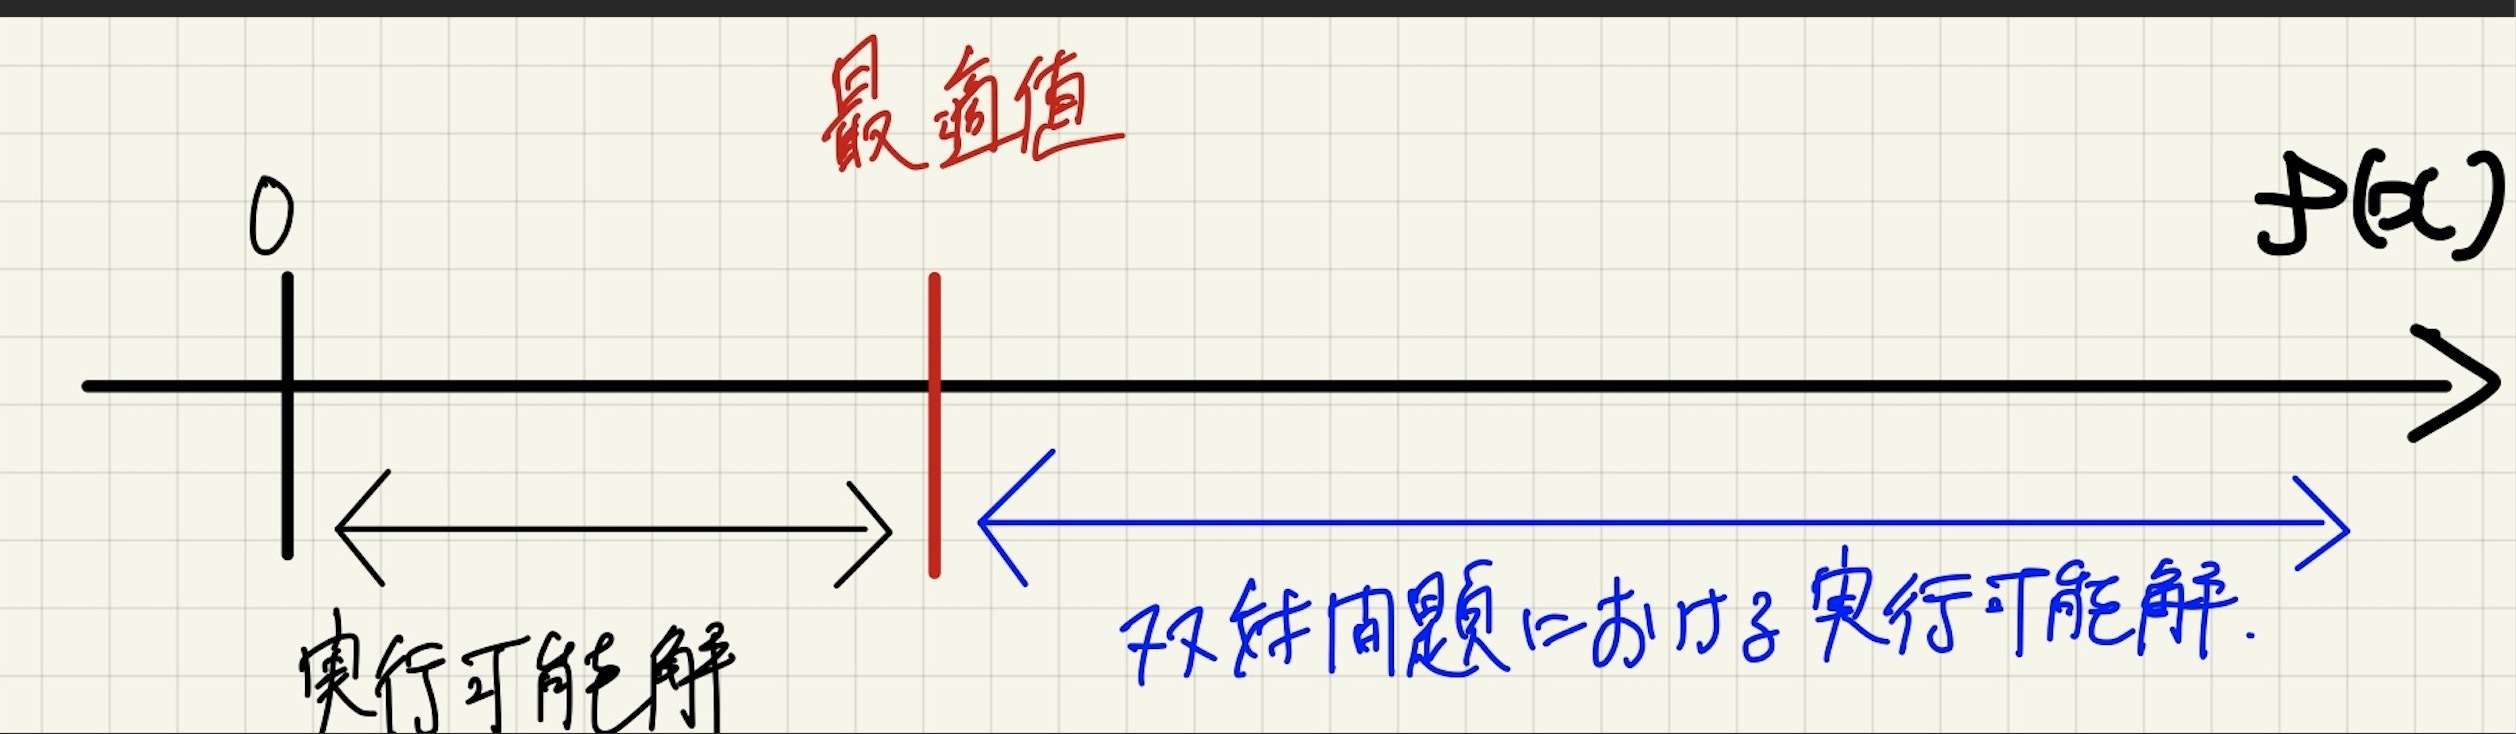




主問題と双対問題の最適値は一緒になることを**双対定理**と言います．

これが実際そうなのかコードで確認してみましょう．

---

上の例で示した問題を双対問題に変形すると，以下のようになります．

$$
\begin{gathered}
\min \quad \quad 10 u+15 v + 10 \\
\text { s.t. } \quad u \geq 0 \\
v \geq 0 \\
u+8 v \geq 3 \\
u+v \geq-5
\end{gathered}
$$

In [13]:
import pulp

problem = pulp.LpProblem('LP',pulp.LpMinimize) #LP問題で最小化問題

#変数uとvを定義

u = pulp.LpVariable('u',cat='Continuous')
v = pulp.LpVariable('v',cat='Continuous')

#制約条件の追加

problem += u >= 0
problem += v >= 0
problem += u + 8 * v >= 3
problem += u + v >= -5

#最適したい式も追加する

problem += 10 * u + 15 * v + 10

status = problem.solve()

print(f'最適な時のuの値は{u.value()},vの値は{v.value()},その時の式の値は{problem.objective.value()}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ichiharayuuseimare/opt/anaconda3/envs/syumi-note/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/092de1415ddc48a881fa6a46ee9f9aae-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/092de1415ddc48a881fa6a46ee9f9aae-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 5.625
After Postsolve, objective 5.625, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5.625 - 0 iterations time 0.002, Presolve 0.00
Option for p

式の値が同じなので，双対定理が成り立ちました．

しかしながら，全ての最適化問題で最適な値が一致するとは限らないため，問題が起きてしまうことがあります．

ちなみに原理通りに主問題から双対問題の式を構成すると,$\min \quad \quad 10 u+15 v $ になり，この最適化問題を解くと，値は同じにならなく，双対定理が成り立ちません，

つまり，成り立たないけど，どちらの情報も使って最適化問題を解きたいとき，使用されるのがPrimal-Dual法(PD)です．

PDは主問題と双対問題を交互にとき，最適な値を近づけていく方法です．

---

以下にアルゴリズムを示します．

Primal-Dual法は、以下のような反復的なアルゴリズムです.

主問題と双対問題については上の例を使います．


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ichiharayuuseimare/opt/anaconda3/envs/syumi-note/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/9301af1f7df348ba9a5111c8aa54fb8f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/9301af1f7df348ba9a5111c8aa54fb8f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 20 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve thinks problem is unbounded
Analysis indicates model infeasible or unbounded
0  Obj -0 Dual inf 0.060606402 (2) w.o. free dual inf (0)
0  Obj -0 Dual inf 0.060606402 (2) w.o. free dual inf (0)
0  Obj -0 Dual inf 0.060606402 (2) w.o. free dual inf (0)
Dual infeasible - objective 

/Users/ichiharayuuseimare/opt/anaconda3/envs/syumi-note/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


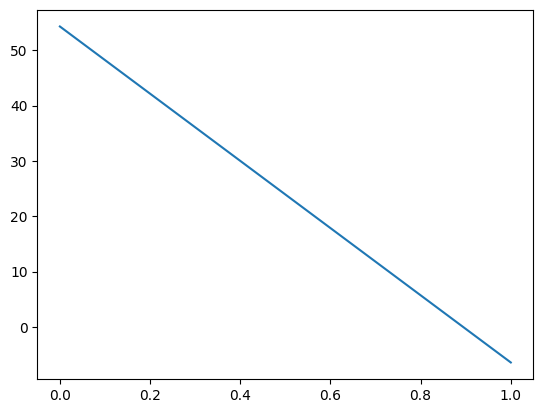

In [20]:
import pulp
import matplotlib.pyplot as plt
#主問題の定義
x = pulp.LpVariable('x', cat='Continuous')
y = pulp.LpVariable('y', cat='Continuous')

problem = pulp.LpProblem('Primal problem', pulp.LpMaximize)
problem += 3*x - 5*y + 10
problem += x + y <= 10
problem += 8*x + y <= 15

#双対問題を定義
u = pulp.LpVariable('u', cat='Continuous')
v = pulp.LpVariable('v', cat='Continuous')

dual_problem = pulp.LpProblem('Dual problem', pulp.LpMinimize)
dual_problem += 10*u + 15*v
dual_problem += u + 8*v >= 3
dual_problem += u + v >= -5

#Primal-Dual法で解く
iterations = 100 #反復回数
epsilon = 1e-5 #収束判定の閾値
gaps = [] #双対問題と主問題の差を格納するリスト

for _ in range(iterations):
    status = problem.solve()
    dual_status = dual_problem.solve()
    primal_obj = pulp.value(problem.objective)
    dual_obj = pulp.value(dual_problem.objective)
    
    gap = primal_obj - dual_obj #双対問題と主問題の差
    gaps.append(gap)

    if gap < epsilon:
        print('Converged')
        break

    #閾値以下にならなかった場合は主問題と双対問題の制約条件を更新
    u_value = pulp.value(u)
    v_value = pulp.value(v)

    x_coef = 10 - u_value
    y_coef = 1 - u_value - v_value
    problem += x_coef*(x - x.value()) + y_coef*(y - y.value()) >= gap
    dual_problem += 3*(u - u_value) + (-5)*(v - v_value) <= -gap
    
    print('Status:', pulp.LpStatus[status])
    print('x =', pulp.value(x))
    print('y =', pulp.value(y))
    print('Primal objective =', primal_obj)
    print('Dual objective =', dual_obj)
    print('Gap =', gap)
plt.plot(gaps)

2回の反復で収束していますね．

より多くの制約条件が絡んでくるのに比例して，収束のスピードは遅くなっていきます，